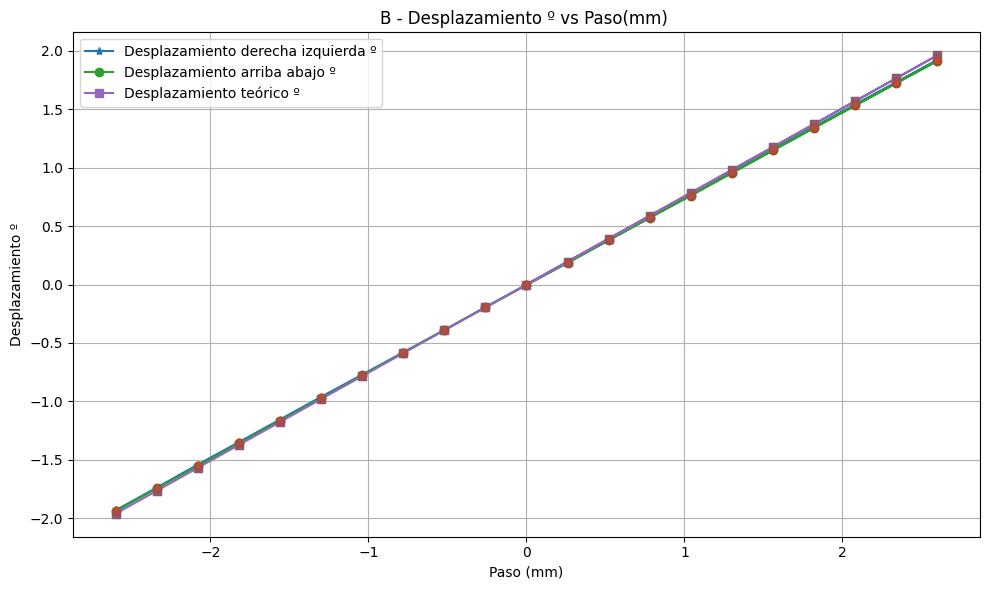

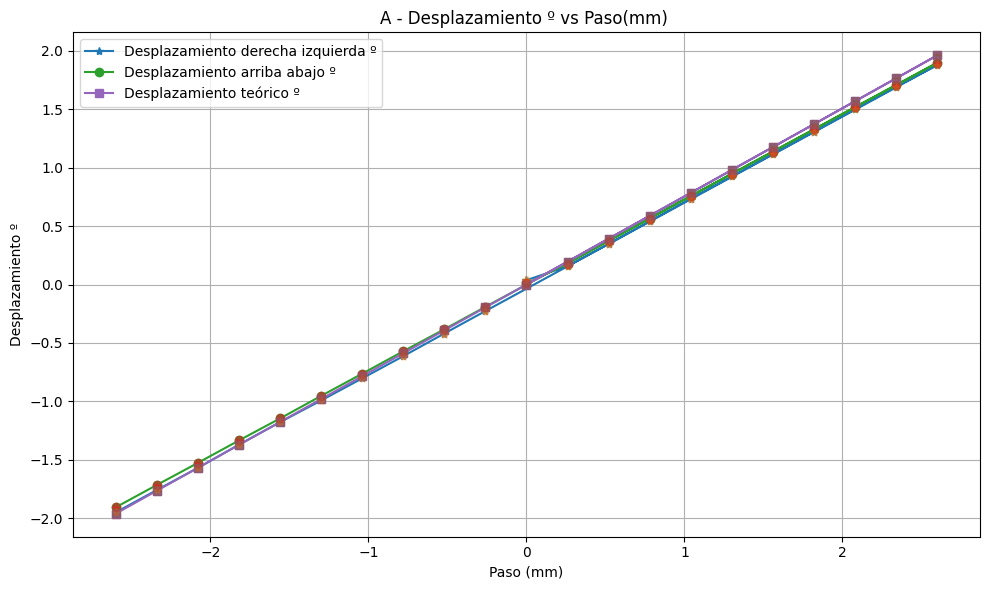

In [1]:
from openpyxl import load_workbook
import matplotlib.pyplot as plt

# --- Funciones ---
def leer_hoja(hoja):
    paso, lr, ud, t = [], [], [], []
    for row in hoja.iter_rows(min_row=1):
        values = [row[2].value, row[3].value, row[5].value, row[7].value]
        listas = [paso, lr, ud, t]
        for val, lista in zip(values, listas):
            if isinstance(val, (int, float)):
                lista.append(val)
    return paso, lr, ud, t

def plot_with_errorbars(V, vuelta, label, marker, yerror, xerror):
    plt.plot(V, vuelta, marker=marker, label=label)
    plt.errorbar(V, vuelta, yerr=yerror, xerr=xerror, fmt=marker, capsize=3, alpha=0.5)

def graficar(paso, lr, ud, t, titulo):
    fig = plt.figure(figsize=(10, 6))
    plot_with_errorbars(paso, lr, 'Desplazamiento derecha izquierda º', '*', 0.001, 0.01)
    plot_with_errorbars(paso, ud, 'Desplazamiento arriba abajo º', 'o', 0.001, 0.01)
    plot_with_errorbars(paso, t, 'Desplazamiento teórico º', 's', 0.001, 0.01)
    plt.xlabel('Paso (mm)')
    plt.ylabel('Desplazamiento º')
    plt.title(titulo)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    return fig

# --- Carga de datos ---
workbook = load_workbook('VERANODICU.xlsx')
datos = {
    "A": leer_hoja(workbook['MONTURA A- INCL NEGRO']),
    "B": leer_hoja(workbook.worksheets[1])
}

# --- Gráficas ---
figures = []
figures.append(graficar(*datos["B"], 'B - Desplazamiento º vs Paso(mm) '))
figures.append(graficar(*datos["A"], 'A - Desplazamiento º vs Paso(mm) '))

if figures:
    plt.show()
